<a href="https://colab.research.google.com/github/barroso2501/patches_taxonomy/blob/main/UNet_Patches_Taxonomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install rasterio
!pip install tqdm

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 78.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


In [3]:
import torch
import torch.nn as nn

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )
    def forward(self, x):
        return self.block(x)

class UNet3Saidas(nn.Module):
    def __init__(self, in_channels=2):
        super().__init__()
        self.enc1 = DoubleConv(in_channels, 64)
        self.enc2 = DoubleConv(64, 128)
        self.enc3 = DoubleConv(128, 256)
        self.enc4 = DoubleConv(256, 512)
        self.pool = nn.MaxPool2d(2)
        self.bottleneck = DoubleConv(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, 2, 2)
        self.dec4 = DoubleConv(1024, 512)

        self.upconv3 = nn.ConvTranspose2d(512, 256, 2, 2)
        self.dec3 = DoubleConv(512, 256)

        self.upconv2 = nn.ConvTranspose2d(256, 128, 2, 2)
        self.dec2 = DoubleConv(256, 128)

        self.upconv1 = nn.ConvTranspose2d(128, 64, 2, 2)
        self.dec1 = DoubleConv(128, 64)

        self.out_estavel = nn.Conv2d(64, 2, 1)
        self.out_perda = nn.Conv2d(64, 4, 1)
        self.out_ganho = nn.Conv2d(64, 4, 1)

    def forward(self, x):
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool(enc1))
        enc3 = self.enc3(self.pool(enc2))
        enc4 = self.enc4(self.pool(enc3))

        bottleneck = self.bottleneck(self.pool(enc4))

        dec4 = self.upconv4(bottleneck)
        dec4 = self.dec4(torch.cat([dec4, enc4], dim=1))

        dec3 = self.upconv3(dec4)
        dec3 = self.dec3(torch.cat([dec3, enc3], dim=1))

        dec2 = self.upconv2(dec3)
        dec2 = self.dec2(torch.cat([dec2, enc2], dim=1))

        dec1 = self.upconv1(dec2)
        dec1 = self.dec1(torch.cat([dec1, enc1], dim=1))

        return {
            'estavel': self.out_estavel(dec1),
            'perda': self.out_perda(dec1),
            'ganho': self.out_ganho(dec1)
        }

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Iniciando ambiente

In [5]:
# Certifique-se de ter definido a UNet3Saidas antes
model = UNet3Saidas(in_channels=2).to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/DADOS/unet_treinado_ep7.pth'))
model.eval()

UNet3Saidas(
  (enc1): DoubleConv(
    (block): Sequential(
      (0): Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (enc2): DoubleConv(
    (block): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (enc3): DoubleConv(
    (block): Sequential(
      (0): Conv2d(128, 256, ke

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet3Saidas(in_channels=2).to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/DADOS/unet_treinado_ep7.pth'))
model.eval()


UNet3Saidas(
  (enc1): DoubleConv(
    (block): Sequential(
      (0): Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (enc2): DoubleConv(
    (block): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (enc3): DoubleConv(
    (block): Sequential(
      (0): Conv2d(128, 256, ke

Carregar arquivos t1 e t2

In [7]:
import numpy as np
t1 = np.load('/content/drive/MyDrive/DADOS/t1_binary_areaC.npy')
t2 = np.load('/content/drive/MyDrive/DADOS/t2_binary_areaC.npy')

# Remove dimensão extra se necessário
if t1.ndim == 3 and t1.shape[0] == 1:
    t1 = t1[0]
if t2.ndim == 3 and t2.shape[0] == 1:
    t2 = t2[0]

In [11]:
t1 = np.load('/content/drive/MyDrive/DADOS/t1_binary_areaA.npy')
t2 = np.load('/content/drive/MyDrive/DADOS/t2_binary_areaA.npy')
label = np.load('/content/drive/MyDrive/DADOS/labels_areaA.npy')

# Corrigir shape se necessário
if t1.ndim == 3: t1 = t1.squeeze(0)
if t2.ndim == 3: t2 = t2.squeeze(0)
if label.ndim == 3: label = label.squeeze(0)


Aplicar modelo em blocos

In [9]:
# Mesma função que já usamos para aplicar em blocos
predito = aplicar_modelo_em_area(t1, t2, model, device, tile_size=512, stride=512)

# Salvar como .npy (opcional)
np.save('/content/drive/MyDrive/DADOS/predict_areaC.npy', predito)

NameError: name 'aplicar_modelo_em_area' is not defined

In [10]:
label = np.load("/content/drive/MyDrive/DADOS/labels_areaC.npy")

In [ ]:
# Remove a dimensão extra do label, se existir
if label.ndim == 3 and label.shape[0] == 1:
    label = label.squeeze(0)

Carregamento de dados

Verificaçao de consistencia de shape

Função para extrair janelas de erro

Executar extração de janelas 128x128 e stride 64

Criar Dataset e Dataloader

Recaregar o modelo e ajustar o otimizador

Rodar o multiramos

multirmos auxiliar

salvando o modelo

cortar bloco

In [12]:
def cortar_blocos_com_percentual_mudanca(t1, t2, label, tile_size=512, stride=512):
    """
    Corta blocos (tile_size x tile_size) de t1, t2 e label,
    e calcula a % de mudança com base nas classes reclassificadas:
    22–25 (perda) e 36–39 (ganho).
    """
    classes_mudanca = [22, 23, 24, 25, 36, 37, 38, 39]
    H, W = t1.shape
    blocos_X, blocos_y, stats = [], [], []

    for i in range(0, H - tile_size + 1, stride):
        for j in range(0, W - tile_size + 1, stride):
            bloco_t1 = t1[i:i+tile_size, j:j+tile_size]
            bloco_t2 = t2[i:i+tile_size, j:j+tile_size]
            bloco_label = label[i:i+tile_size, j:j+tile_size]

            n_mudanca = np.isin(bloco_label, classes_mudanca).sum()
            pct_mudanca = n_mudanca / (tile_size * tile_size)

            x = np.stack([bloco_t1, bloco_t2])  # (2, H, W)
            blocos_X.append(x)
            blocos_y.append(bloco_label)
            stats.append(pct_mudanca)

    return np.array(blocos_X), np.array(blocos_y), np.array(stats)


In [16]:
# Carrega os arquivos da área B
t1 = np.load('/content/drive/MyDrive/DADOS/t1_binary_areaC.npy')
t2 = np.load('/content/drive/MyDrive/DADOS/t2_binary_areaC.npy')
label = np.load('/content/drive/MyDrive/DADOS/labels_areaC.npy')

# Remove banda extra, se houver
if t1.ndim == 3: t1 = t1.squeeze(0)
if t2.ndim == 3: t2 = t2.squeeze(0)
if label.ndim == 3: label = label.squeeze(0)

# Gera os blocos e calcula % de mudança
X_C, y_C, stats_C = cortar_blocos_com_percentual_mudanca(t1, t2, label)


In [17]:
print(f"Área A: {len(X_A)} blocos | Mudança média: {stats_A.mean():.4%}")
print(f"Área B: {len(X_B)} blocos | Mudança média: {stats_B.mean():.4%}")
print(f"Área C: {len(X_C)} blocos | Mudança média: {stats_C.mean():.4%}")
print(f"Área D: {len(X_D)} blocos | Mudança média: {stats_D.mean():.4%}")


Área A: 15 blocos | Mudança média: 33.0071%
Área B: 36 blocos | Mudança média: 8.1624%
Área C: 36 blocos | Mudança média: 10.6647%
Área D: 63 blocos | Mudança média: 8.6342%


In [18]:
# Concatena os blocos das áreas A, B, C, D
X_total = np.concatenate([X_A, X_B, X_C, X_D], axis=0)
y_total = np.concatenate([y_A, y_B, y_C, y_D], axis=0)

# Verificação de shapes
print(f"Blocos de entrada (X): {X_total.shape}")  # Esperado: (N, 2, 512, 512)
print(f"Blocos de saída (y): {y_total.shape}")    # Esperado: (N, 512, 512)


Blocos de entrada (X): (150, 2, 512, 512)
Blocos de saída (y): (150, 512, 512)


In [24]:
# Caminho de salvamento
np.savez_compressed('/content/drive/MyDrive/DADOS/blocos_treinamento_unificado_A_B_C_D.npz',
                    X=X_total, y=y_total)
print("✅ Arquivo salvo com sucesso!")


✅ Arquivo salvo com sucesso!


In [19]:
import torch
from torch.utils.data import Dataset

class PatchDataset(Dataset):
    """
    Dataset PyTorch para blocos multicanais de entrada (2 canais: t1, t2)
    e rótulo por pixel (valores inteiros reclassificados de 0 a 39).
    """
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = torch.tensor(self.X[idx], dtype=torch.float32)
        y = torch.tensor(self.y[idx], dtype=torch.long)
        return x, y


In [20]:
# Carrega o arquivo salvo
data = np.load('/content/drive/MyDrive/DADOS/blocos_treinamento_unificado_A_B_C_D.npz')
X_total = data['X']
y_total = data['y']

# Cria o dataset e o dataloader
dataset = PatchDataset(X_total, y_total)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)


1. Definição da UNet3Saidas

In [21]:
import torch
import torch.nn as nn

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.block(x)

class UNet3Saidas(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.enc1 = DoubleConv(in_channels, 64)
        self.enc2 = DoubleConv(64, 128)
        self.enc3 = DoubleConv(128, 256)
        self.enc4 = DoubleConv(256, 512)
        self.pool = nn.MaxPool2d(2)

        self.bottleneck = DoubleConv(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.dec4 = DoubleConv(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = DoubleConv(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = DoubleConv(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = DoubleConv(128, 64)

        # Três ramos de saída
        self.out_estavel = nn.Conv2d(64, 2, kernel_size=1)  # classes 0–1
        self.out_perda = nn.Conv2d(64, 4, kernel_size=1)    # classes 22–25
        self.out_ganho = nn.Conv2d(64, 4, kernel_size=1)    # classes 36–39

    def forward(self, x):
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool(enc1))
        enc3 = self.enc3(self.pool(enc2))
        enc4 = self.enc4(self.pool(enc3))

        bottleneck = self.bottleneck(self.pool(enc4))

        dec4 = self.dec4(torch.cat([self.upconv4(bottleneck), enc4], dim=1))
        dec3 = self.dec3(torch.cat([self.upconv3(dec4), enc3], dim=1))
        dec2 = self.dec2(torch.cat([self.upconv2(dec3), enc2], dim=1))
        dec1 = self.dec1(torch.cat([self.upconv1(dec2), enc1], dim=1))

        return {
            'estavel': self.out_estavel(dec1),
            'perda': self.out_perda(dec1),
            'ganho': self.out_ganho(dec1)
        }


 2. Função de perda perda_multiramos()

In [22]:
def perda_multiramos(saidas, y_true, classe_bruta, device):
    ce = nn.CrossEntropyLoss()
    total_loss = 0

    mask_estavel = (classe_bruta == 0) | (classe_bruta == 1)
    mask_perda = (classe_bruta == 2)
    mask_ganho = (classe_bruta == 3)

    if mask_estavel.any():
        y_e = y_true[mask_estavel]
        pred_e = saidas['estavel'].permute(0, 2, 3, 1)[mask_estavel]
        total_loss += ce(pred_e, y_e)

    if mask_perda.any():
        y_p_full = y_true[mask_perda]
        mask_valida = (y_p_full >= 22) & (y_p_full <= 25)
        if mask_valida.any():
            y_p = y_p_full[mask_valida] - 22
            pred_p = saidas['perda'].permute(0, 2, 3, 1)[mask_perda][mask_valida]
            total_loss += ce(pred_p, y_p)

    if mask_ganho.any():
        y_g_full = y_true[mask_ganho]
        mask_valida = (y_g_full >= 36) & (y_g_full <= 39)
        if mask_valida.any():
            y_g = y_g_full[mask_valida] - 36
            pred_g = saidas['ganho'].permute(0, 2, 3, 1)[mask_ganho][mask_valida]
            total_loss += ce(pred_g, y_g)

    return total_loss


3. Loop de treino treinar_uma_epoca_multiramos()

In [23]:
def treinar_uma_epoca_multiramos(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0

    for x_batch, y_true in dataloader:
        x_batch = x_batch.to(device)
        y_true = y_true.to(device)

        t1 = x_batch[:, 0, :, :]
        t2 = x_batch[:, 1, :, :]
        classe_bruta = torch.zeros_like(y_true)

        classe_bruta = torch.where((t1 == 1) & (t2 == 1), 0, classe_bruta)  # estabilidade vegetação
        classe_bruta = torch.where((t1 == 0) & (t2 == 0), 1, classe_bruta)  # estabilidade vazio
        classe_bruta = torch.where((t1 == 1) & (t2 == 0), 2, classe_bruta)  # perda
        classe_bruta = torch.where((t1 == 0) & (t2 == 1), 3, classe_bruta)  # ganho

        optimizer.zero_grad()
        saidas = model(x_batch)
        loss = perda_multiramos(saidas, y_true, classe_bruta, device)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(dataloader)


In [24]:
model = UNet3Saidas(in_channels=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [49]:
for epoca in range(10):
    loss = treinar_uma_epoca_multiramos(model, dataloader, optimizer, device)
    print(f"Época {epoca+1}: loss médio = {loss:.4f}")
# Salva após cada época
    torch.save(model.state_dict(), f'/content/drive/MyDrive/DADOS/unet_treinado_ep{epoca+1}.pth')

Época 1: loss médio = 0.0018
Época 2: loss médio = 0.0017
Época 3: loss médio = 0.0017
Época 4: loss médio = 0.0018
Época 5: loss médio = 0.0022
Época 6: loss médio = 0.0017
Época 7: loss médio = 0.0103
Época 8: loss médio = 0.1856
Época 9: loss médio = 0.2338
Época 10: loss médio = 0.2446


In [48]:
torch.save(model.state_dict(), '/content/drive/MyDrive/DADOS/unet_treinado_FINAL_vAtoD.pth')


importar bibliotecas

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


 Função para gerar predições e métricas

In [41]:
def avaliar_modelo_multiramos(model, dataloader, device):
    model.eval()
    y_true_total = []
    y_pred_total = []

    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            t1 = x_batch[:, 0, :, :]
            t2 = x_batch[:, 1, :, :]
            classe_bruta = torch.zeros_like(y_batch)

            classe_bruta = torch.where((t1 == 1) & (t2 == 1), 0, classe_bruta)
            classe_bruta = torch.where((t1 == 0) & (t2 == 0), 1, classe_bruta)
            classe_bruta = torch.where((t1 == 1) & (t2 == 0), 2, classe_bruta)
            classe_bruta = torch.where((t1 == 0) & (t2 == 1), 3, classe_bruta)

            saidas = model(x_batch)

            # Previsões por grupo
            pred_e = torch.argmax(saidas['estavel'], dim=1)
            pred_p = torch.argmax(saidas['perda'], dim=1) + 22
            pred_g = torch.argmax(saidas['ganho'], dim=1) + 36

            pred_final = torch.zeros_like(y_batch)
            pred_final[classe_bruta == 0] = pred_e[classe_bruta == 0]
            pred_final[classe_bruta == 1] = pred_e[classe_bruta == 1]
            pred_final[classe_bruta == 2] = pred_p[classe_bruta == 2]
            pred_final[classe_bruta == 3] = pred_g[classe_bruta == 3]

            y_true_total.append(y_batch.cpu().flatten())
            y_pred_total.append(pred_final.cpu().flatten())

    # Junta tudo
    y_true = torch.cat(y_true_total).numpy()
    y_pred = torch.cat(y_pred_total).numpy()

    # Avaliação
    print(f"Acurácia total por pixel: {np.mean(y_true == y_pred):.4f}\n")

    # Relatório por classe
    print("Relatório por classe (0 a 39):")
    print(classification_report(y_true, y_pred, labels=np.unique(y_true), zero_division=0))

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.xlabel("Classe predita")
    plt.ylabel("Classe real")
    plt.title("Matriz de Confusão")
    plt.tight_layout()
    plt.show()


Executar a avaliação

Acurácia total por pixel: 0.9995

Relatório por classe (0 a 39):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   8846217
           1       1.00      1.00      1.00  25974790
          22       1.00      1.00      1.00    231585
          23       0.99      1.00      1.00   2566285
          24       0.98      0.96      0.97     64538
          25       1.00      0.98      0.99    756813
          36       1.00      1.00      1.00    127375
          37       1.00      1.00      1.00    237829
          38       1.00      1.00      1.00     31175
          39       1.00      1.00      1.00    484993

    accuracy                           1.00  39321600
   macro avg       1.00      0.99      0.99  39321600
weighted avg       1.00      1.00      1.00  39321600



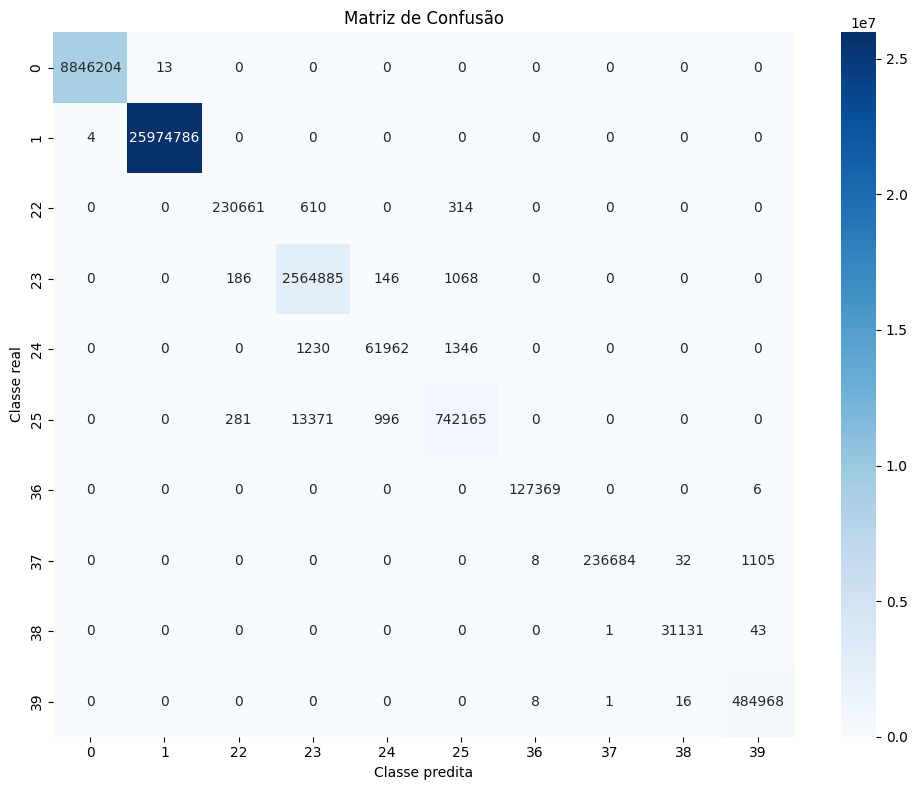

In [42]:
avaliar_modelo_multiramos(model, dataloader, device)
